# Smote

SMOTE es una técnica de sobremuestreo que genera ejemplos sintéticos de la clase minoritaria para balancear el conjunto de datos. En lugar de simplemente duplicar las instancias existentes de la clase minoritaria, SMOTE crea nuevas instancias sintéticas interpolando entre los ejemplos de la clase minoritaria.

## Cargar el Dataset Wine

### Aquí se está fusionando las clases 1 y 2 en una sola clase (cambiando los valores de la clase 2 por 1), creando un dataset desbalanceado donde la clase 0 tendrá muchas más muestras que la clase 1. Esto es para simular un caso de clases desbalanceadas, un problema común en problemas de clasificación.

In [6]:
!pip install imblearn

In [7]:

#! pip install imbalanced-learn
#Cargar librerías
import numpy as np
import matplotlib.pyplot as plt
#import imblearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Cargar el dataset Wine
wine = load_wine()
X, y = wine.data, wine.target

# Crear un dataset desbalanceado (fusionamos clases 1 y 2)
y[y == 2] = 1  # Unimos las clases 1 y 2 en una sola
print(f"Distribución original: {np.bincount(y)}")

Distribución original: [ 59 119]


## Entrenar el Modelo sin SMOTE:

Divide el dataset en conjuntos de entrenamiento y prueba. El 30% de los datos se destina para pruebas.

***stratify=y:*** Esto asegura que las clases estén distribuidas de manera proporcional en ambos conjuntos (entrenamiento y prueba).

***random_state=42***: Establece una semilla para asegurar que los resultados sean reproducibles.

In [8]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Entrenar modelo sin SMOTE
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n--- Antes de aplicar SMOTE ---")
print(classification_report(y_test, y_pred))


--- Antes de aplicar SMOTE ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.97      0.97      0.97        36

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



## Aplicar SMOTE para Balancear las Clases

Se crea un objeto SMOTE para balancear las clases.

***fit_resample():*** Aplica la técnica de SMOTE al conjunto de entrenamiento, generando nuevas muestras sintéticas de la clase minoritaria para igualar el número de ejemplos en ambas clases.

***np.bincount(y_train_smote):*** Muestra la distribución de clases en el conjunto de entrenamiento después de aplicar SMOTE. Ahora las clases deberían estar balanceadas.

In [9]:
# Aplicar SMOTE para balancear
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"\nDistribución después de SMOTE: {np.bincount(y_train_smote)}")

# Entrenar modelo con datos balanceados
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test)

print("\n--- Después de aplicar SMOTE ---")
print(classification_report(y_test, y_pred_smote))


Distribución después de SMOTE: [83 83]

--- Después de aplicar SMOTE ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.97      0.99        36

    accuracy                           0.98        54
   macro avg       0.97      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



## Visualización de los resultados

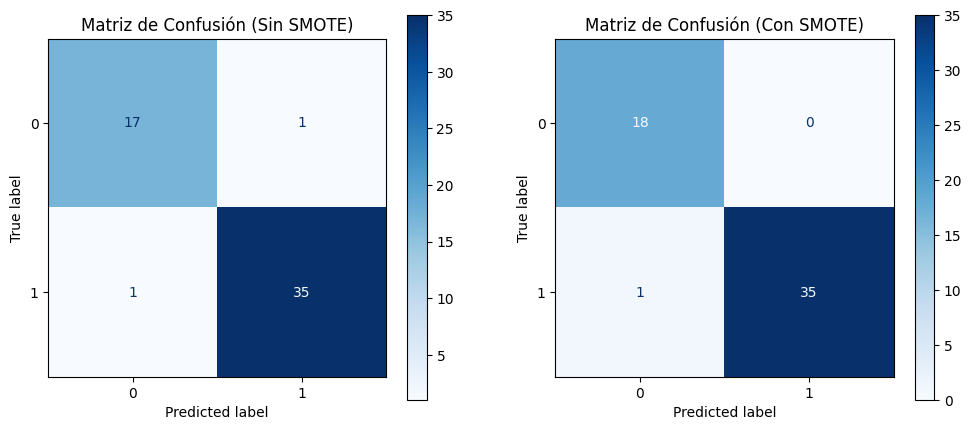

In [10]:
# Mostrar la matriz de confusión antes y después
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("Matriz de Confusión (Sin SMOTE)")

ConfusionMatrixDisplay.from_estimator(clf_smote, X_test, y_test, ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title("Matriz de Confusión (Con SMOTE)")

plt.show()

# ADASYN

ADASYN es una mejora sobre SMOTE que no solo genera ejemplos sintéticos, sino que lo hace de forma adaptativa. Es decir, ADASYN se centra en las instancias de la clase minoritaria que están más cerca de la frontera de decisión, donde el modelo tiene más dificultades para clasificar correctamente.

## Cargar el Dataset Wine
### Aquí se está fusionando las clases 1 y 2 en una sola clase (cambiando los valores de la clase 2 por 1), creando un dataset desbalanceado donde la clase 0 tendrá muchas más muestras que la clase 1. Esto es para simular un caso de clases desbalanceadas, un problema común en problemas de clasificación.

In [11]:
# Cargar el dataset Wine
wine = load_wine()
X, y = wine.data, wine.target

# Crear un dataset desbalanceado (fusionamos clases 1 y 2)
y[y == 2] = 1  # Unimos las clases 1 y 2 en una sola
print(f"Distribución original: {np.bincount(y)}")

Distribución original: [ 59 119]


## Entrenar el Modelo sin ADASYN

Divide el dataset en conjuntos de entrenamiento y prueba. El 30% de los datos se destina para pruebas.

stratify=y: Esto asegura que las clases estén distribuidas de manera proporcional en ambos conjuntos (entrenamiento y prueba).

random_state=42: Establece una semilla para asegurar que los resultados sean reproducibles.

In [12]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Entrenar modelo sin ADASYN
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n--- Antes de aplicar ADASYN ---")
print(classification_report(y_test, y_pred))


--- Antes de aplicar ADASYN ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.97      0.97      0.97        36

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



## Aplicar ADASYN para Balancear las Clases

Se crea un objeto ADASYN para balancear las clases.

***fit_resample():*** Aplica la técnica de ADASYN  al conjunto de entrenamiento, generando nuevas muestras sintéticas de la clase minoritaria para igualar el número de ejemplos en ambas clases.

***np.bincount(y_train_smote):*** Muestra la distribución de clases en el conjunto de entrenamiento después de aplicar ADASYN . Ahora las clases deberían estar balanceadas.

In [13]:
# Aplicar ADASYN para balancear
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print(f"\nDistribución después de ADASYN: {np.bincount(y_train_adasyn)}")

# Entrenar modelo con datos balanceados
clf_adasyn = RandomForestClassifier(random_state=42)
clf_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = clf_adasyn.predict(X_test)

print("\n--- Después de aplicar ADASYN ---")
print(classification_report(y_test, y_pred_adasyn))


Distribución después de ADASYN: [82 83]

--- Después de aplicar ADASYN ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.97      0.99        36

    accuracy                           0.98        54
   macro avg       0.97      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



## Visualización de los resultados

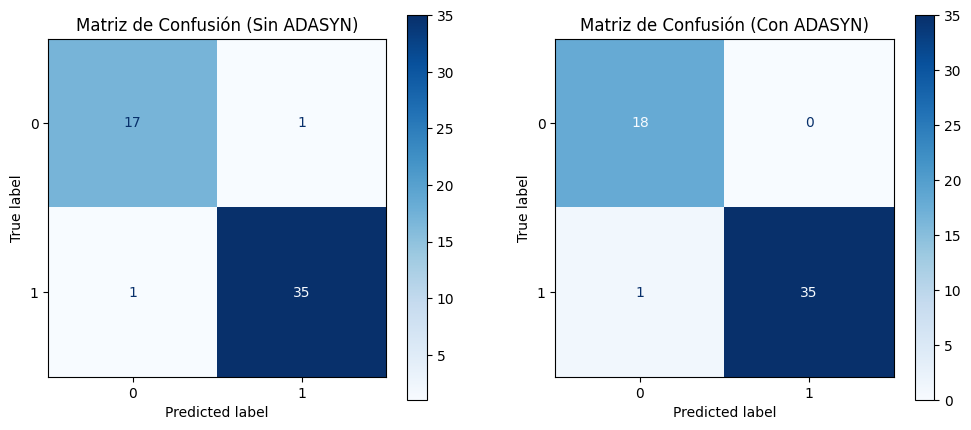

In [14]:
# Mostrar la matriz de confusión antes y después
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("Matriz de Confusión (Sin ADASYN)")

ConfusionMatrixDisplay.from_estimator(clf_adasyn, X_test, y_test, ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title("Matriz de Confusión (Con ADASYN)")

plt.show()